# Annotate meta files

In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
pd.set_option('display.max_colwidth', None)

In [77]:
DIR = "ParlaMint-BG.txt"

for root, dirs, files in os.walk(DIR, topdown=True):
    files = [file for file in files if file.endswith(".txt") and file != "00README.txt"]
    for file in tqdm(files):
        file_id, end = os.path.splitext(file)
        metafile = file_id + "-meta.csv"
        
        filepath = os.path.join(root, file)
        metapath = os.path.join(root, metafile)   
        
        df_txt = pd.read_csv(filepath, delimiter = "\t", names = ["ID", "Speech"]).set_index("ID")
        df_meta = pd.read_csv(metapath, delimiter = "\t")
        
        df = df_meta.join(df_txt, on = "ID")
        
        df["Comission"] = df["Speech"].str.contains("Комисията не подкрепя|Комисията подкрепя")
        df_meta["Comission"] = df["Comission"]
        
        df_meta.to_csv(metapath, sep = "\t", index = False)


0it [00:00, ?it/s]
100%|█████████████████████████████████████████| 128/128 [00:03<00:00, 32.50it/s]


# Statistics on Comission Speeches 

In [94]:
df_dk = pd.read_csv("ParlaMint-BG-SENT.csv", delimiter = ",", dtype = object)
df_dk = df_dk[df_dk["Speaker_role"]!= "Chairperson"]
df_dk = df_dk.drop(df_dk[(df_dk["Speaker_Minister"] == "-") & (df_dk["Speaker_MP"] == "notMP")].index)
df_dk["Word_total"] = df_dk["Word_total"].astype(float)
df_dk = df_dk[df_dk["Word_total"] > 10]
df_dk["Score"] = df_dk["Score"].astype(float)
df_dk["Sentiment"] = df_dk["Sentiment"].astype(float)
df_dk["Negscore"] = df_dk["Negscore"].astype(float)/df_dk["Word_total"]
pd.set_option('display.max_colwidth', None)

In [83]:
df_dk.groupby("Party_status")["Comission"].value_counts()

Party_status  Comission
Coalition     False        23659
              True         10270
Opposition    False        34496
              True          1528
Name: Comission, dtype: int64

In [92]:
df_dk[df_dk["Comission"] == "False"].groupby("Party_status")["Score"].mean()

Party_status
Coalition     0.037631
Opposition    0.037719
Name: Score, dtype: float64

In [96]:
df_dk[df_dk["Comission"] == "False"].groupby("Party_status")["Negscore"].mean()

Party_status
Coalition     0.029749
Opposition    0.027953
Name: Negscore, dtype: float64

In [97]:
df_dk.groupby("Comission")["Score"].mean()

Comission
False    0.037888
True     0.013118
Name: Score, dtype: float64

<AxesSubplot:>

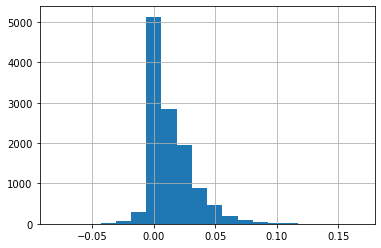

In [102]:
df_dk[df_dk["Comission"] == "True"]["Score"].hist(bins = 20)

In [105]:
df_dk[df_dk["Score"] == 0.0].groupby("Comission")["ID"].count()

Comission
False    2740
True     3985
Name: ID, dtype: int64

In [106]:
df_dk[df_dk["Score"] == 0.0].groupby(["Party_status", "Comission"])["ID"].count()

Party_status  Comission
Coalition     False        1300
              True         3374
Opposition    False        1149
              True          533
Name: ID, dtype: int64

In [107]:
df_dk.groupby("Meeting_type")["Comission"].value_counts()

Meeting_type  Comission
ГЛАСУВАНЕ     False        31937
              True         10310
ДОКЛАД        False         1807
              True            21
ЗАКОНОПРОЕКТ  False         3858
              True           323
ИЗБОР         False         1770
ИЗСЛУШВАНЕ    False         2883
              True            62
КОНТРОЛ       False         1712
ОСТАВКА       False           86
ОТНОСНО       False          121
ОТЧЕТ         False          410
ПРЕДСТАВЯНЕ   False            7
ПРОЕКТ        False         9939
              True           374
ПРОЕКТИ       False          688
              True            21
ПРОМЕНИ       False          128
РАЗИСКВАНИЯ   False          341
РЕШЕНИЕ       False          389
              True             1
ЧЕТЕНЕ        False         2142
              True           654
Name: Comission, dtype: int64